<h1 align="center">Training a Linear Regression Model in PyTorch</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Link de estudo:

* [Pytorch](https://github.com/pytorch/pytorch)

* [Pytorch Tutoriais](https://pytorch.org/tutorials/)

* [Machine Learning Mastery: PhD.:Jason Brownlee](https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/)


* [Machine Learning Mastery - Pytorch: PhD.:Jason Brownlee](https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/)


A `Regressão Linear` é uma técnica simples, porém poderosa, para prever os valores de variáveis ​​com base em outras variáveis. É frequentemente usado para modelar relações entre duas ou mais <font color="yellow">variáveis ​​contínuas</font>, como a relação entre `renda` e `idade` ou a relação entre `peso` e `altura`. Da mesma forma, a regressão linear pode ser usada para <font color="yellow">prever resultados contínuos</font>, como demanda de preço ou quantidade, com base em outras variáveis ​​conhecidas por influenciar esses resultados.

Para treinar um modelo de regressão linear, precisamos definir uma `função de custo` e um `otimizador`. <font color="yellow">A função de custo é usada para medir o quão bem nosso modelo ajusta os dados</font>, enquanto o otimizador decide em qual direção se mover para melhorar esse ajuste.

Aqui você treinará um modelo de regressão linear e atualizará seus parâmetros de aprendizado usando o `PyTorch`. Nós aprenderemos:

* Como você pode criar um modelo de regressão linear simples do zero no `PyTorch`.

* Como você pode aplicar um modelo de regressão linear simples em um conjunto de dados.

* Como um modelo de regressão linear simples pode ser treinado em um único parâmetro que pode ser aprendido.

* Como um modelo de regressão linear simples pode ser treinado em dois parâmetros que podem ser aprendidos.

# Preparando nosso Dados


Vamos importar algumas bibliotecas que usaremos neste tutorial e criar alguns dados para nossos experimentos.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Usaremos dados sintéticos para treinar o modelo de regressão linear. Vamos inicializar uma variável `X` com valores de $-5$ até $5$ e crie uma função linear que tenha uma inclinação de $-5$. Observe que essa função será estimada por nosso modelo treinado posteriormente.

In [2]:
# Creating a function f(X) with a slope of -5
x = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * x

Além disso, veremos como nossos dados se parecem em um gráfico de linha, usando `matplotlib`.

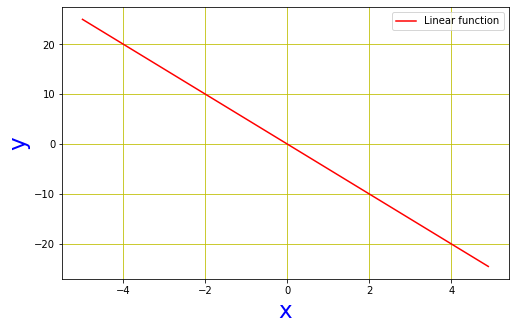

In [3]:
# Plot the line in red with grids
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), y.numpy(), 'r', label='Linear function')
plt.xlabel('x', size=23, c='b')
plt.ylabel('y', size=23, c='b')
plt.legend()
plt.grid('True', color='y')
plt.show()

Como precisamos simular os dados reais que acabamos de criar, vamos adicionar algum `ruído Gaussiano` a eles para criar dados ruidosos do mesmo tamanho que `x`, mantendo o valor do `desvio padrão` em $0.4$. Isso será feito usando `torch.randn(x.size())`.

In [4]:
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = y + 0.4 * torch.randn(x.size())

Agora, vamos visualizar esses pontos de dados usando as linhas de código abaixo.

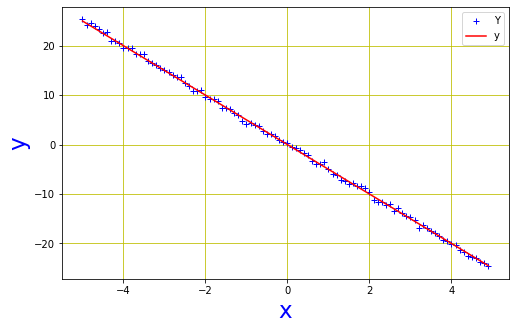

In [5]:
# Plot and visualizing the data points in blue
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(x.numpy(), y.numpy(), 'r', label='y')
plt.xlabel('x', size=23, c='b')
plt.ylabel('y', size=23, c='b')
plt.legend()
plt.grid('True', color='y')
plt.show()

Juntando tudo, temos:

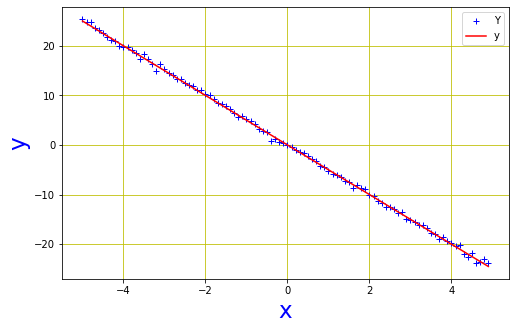

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
 
# Creating a function f(X) with a slope of -5
x = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * x
 
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = y + 0.4 * torch.randn(x.size())
 
# Plot and visualizing the data points in blue
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(x.numpy(), y.numpy(), 'r', label='y')
plt.xlabel('x', size=23, c='b')
plt.ylabel('y', size=23, c='b')
plt.legend()
plt.grid('True', color='y')
plt.show()

# Construindo o Modelo e a função Loss 

Criamos os dados para alimentar o modelo, em seguida, construiremos uma função direta com base em uma `equação de regressão linear simples`. Observe que construiremos o modelo para treinar apenas um único parâmetro ($w$) aqui. Posteriormente, na seguinte seção, adicionaremos o `viés` (bias) e treinaremos o modelo para dois parâmetros ($w$ e $b$). A função para o `forward pass` do modelo é definida da seguinte forma:

In [7]:
# Defining the function for forward pass for prediction
def forward(x):
    return w * x

Nas etapas de treinamento, precisaremos de um critério para medir a Loss entre os pontos de `dados originais` e `previstos`. Esta informação é crucial para as operações de otimização do `gradiente descendente` do modelo e atualizada após cada iteração, a fim de calcular os gradientes e minimizar a Loss. Normalmente, a regressão linear é usada para dados contínuos onde o `Erro Quadrado Médio` (`MSE`) calcula efetivamente a Loss do modelo. Portanto, a métrica `MSE` é a função de critério que usamos aqui.

In [8]:
# Evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Treinando o modelo para um único parâmetro

Com todos esses preparativos, estamos prontos para o treinamento do modelo. Primeiro, o parâmetro $w$ precisa ser inicializado aleatoriamente, <font color="red">por exemplo:</font> para o valor $-10$.

In [10]:
w = torch.tensor(-10.0, requires_grad=True)

Em seguida, definiremos a taxa de aprendizado (`learning rate`) ou o tamanho do passo, uma lista vazia para armazenar a Loss após cada iteração e o número de iterações que queremos que nosso modelo treine. Enquanto o tamanho do passo é definido em $0.1$, treinamos o modelo para $20$ iterações por época.

In [11]:
step_size = 0.1
loss_list = []
iter = 20

Quando as linhas de código abaixo são executadas, a função `forward()` recebe uma entrada e gera uma previsão. A função `criterian()` calcula a Loss e a armazena na variável `loss`. Com base na Loss do modelo, o método `backward()` calcula os gradientes e `w.data` armazena os parâmetros atualizados.

In [12]:
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(x)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))

0,	207.7884979248047,	-1.6799259185791016
1,	92.53118896484375,	-7.229415416717529
2,	41.25444030761719,	-3.5279061794281006
3,	18.441997528076172,	-5.99681282043457
4,	8.292986869812012,	-4.350052356719971
5,	3.777803897857666,	-5.448441505432129
6,	1.7690507173538208,	-4.715816020965576
7,	0.8753777146339417,	-5.204477310180664
8,	0.4777936041355133,	-4.8785400390625
9,	0.30091214179992676,	-5.095940113067627
10,	0.22221951186656952,	-4.950934410095215
11,	0.18720996379852295,	-5.0476531982421875
12,	0.1716347336769104,	-4.983141899108887
13,	0.1647053211927414,	-5.02617073059082
14,	0.16162261366844177,	-4.997470378875732
15,	0.16025114059448242,	-5.016613483428955
16,	0.15964104235172272,	-5.00384521484375
17,	0.1593696027994156,	-5.012361526489258
18,	0.15924878418445587,	-5.006681442260742
19,	0.15919508039951324,	-5.010469913482666


A saída do treinamento do modelo é impressa conforme acima. Como você pode ver, a perda do modelo diminui após cada iteração e o parâmetro treinável (que neste caso é `w`) é atualizada.

Vamos também visualizar através do gráfico para ver como a Loss diminui.

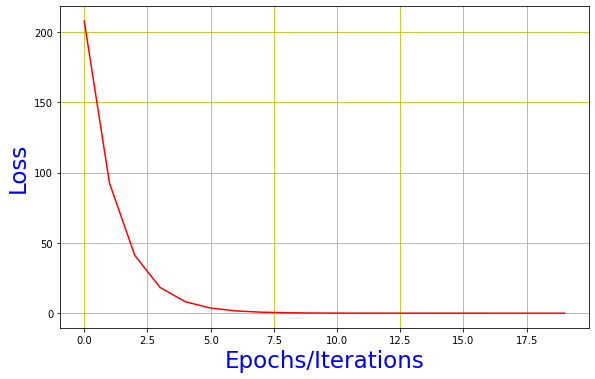

In [13]:
# Plotting the loss after each iteration
plt.figure(figsize=(8, 5))
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations", size=23, c='b')
plt.ylabel("Loss", size=23, c='b')
plt.show()

Juntando tudo:

0,	209.64584350585938,	-1.6428308486938477
1,	93.35840606689453,	-7.217061519622803
2,	41.6234245300293,	-3.4990499019622803
3,	18.607114791870117,	-5.978963851928711
4,	8.367411613464355,	-4.3248610496521
5,	3.811879873275757,	-5.428147792816162
6,	1.7851731777191162,	-4.69225549697876
7,	0.8835127353668213,	-5.183095455169678
8,	0.4823739528656006,	-4.855705261230469
9,	0.30391228199005127,	-5.074074745178223
10,	0.22451671957969666,	-4.928421974182129
11,	0.1891944855451584,	-5.025572776794434
12,	0.17347998917102814,	-4.96077299118042
13,	0.16648852825164795,	-5.003994464874268
14,	0.16337819397449493,	-4.975165843963623
15,	0.16199438273906708,	-4.994394302368164
16,	0.16137874126434326,	-4.981568813323975
17,	0.1611049324274063,	-4.990123748779297
18,	0.16098304092884064,	-4.98441743850708
19,	0.160928875207901,	-4.988223552703857


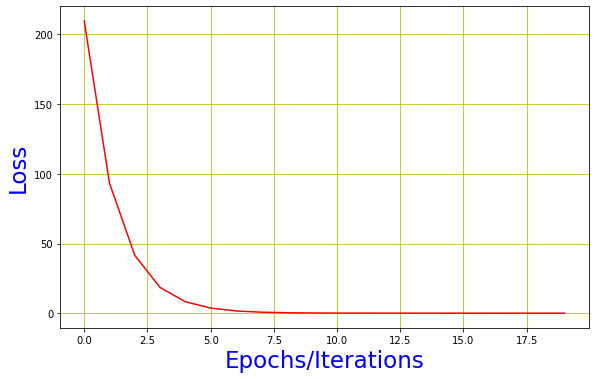

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
x = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * x
Y = y + 0.4 * torch.randn(x.size())
 
# defining the function for forward pass for prediction
def forward(x):
    return w * x
 
# evaluating data points with Mean Square Error
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)
 
w = torch.tensor(-10.0, requires_grad=True)
 
step_size = 0.1
loss_list = []
iter = 20
 
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(x)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))
 
# Plotting the loss after each iteration
plt.figure(figsize=(8, 5))
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations", size=23, c='b')
plt.ylabel("Loss", size=23, c='b')
plt.show()

# Treinando o Modelo para dois Parâmetros

Vamos também adicionar viés $b$ ao nosso modelo e treiná-lo para dois parâmetros. Primeiro, precisamos alterar a função `forward` para a seguinte.

In [14]:
# Defining the function for forward pass for prediction
def forward(x):
    return w * x + b

Como temos dois parâmetros $w$ e $b$, precisamos inicializar ambos com alguns valores aleatórios, como abaixo.

In [15]:
w = torch.tensor(-10.0, requires_grad = True)
b = torch.tensor(-20.0, requires_grad = True)

Embora todos os outros códigos de treinamento permaneçam os mesmos de antes, teremos apenas que fazer algumas alterações para dois parâmetros que podem ser aprendidos.

Mantendo a taxa de aprendizado em $0.1$, vamos treinar nosso modelo para dois parâmetros e para $20$ iterações/épocas.

In [16]:
step_size = 0.1
loss_list = []
iter = 20
 
for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(x)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	599.5753173828125, 	-1.8799266815185547, 	-16.041065216064453
1, 	345.5193786621094, 	-7.2564263343811035, 	-12.792716979980469
2, 	204.17027282714844, 	-3.6378173828125, 	-10.247803688049316
3, 	123.15805053710938, 	-6.025979995727539, 	-8.175686836242676
4, 	75.51385498046875, 	-4.412354946136475, 	-6.54187536239624
5, 	46.89085006713867, 	-5.472304344177246, 	-5.218689918518066
6, 	29.40310287475586, 	-4.752086162567139, 	-4.170741081237793
7, 	18.580198287963867, 	-5.221992492675781, 	-3.3251795768737793
8, 	11.817516326904297, 	-4.90010929107666, 	-2.6534295082092285
9, 	7.562148571014404, 	-5.108087539672852, 	-2.1128106117248535
10, 	4.8709540367126465, 	-4.96396017074585, 	-1.682395339012146
11, 	3.162849187850952, 	-5.055788993835449, 	-1.3366217613220215
12, 	2.0759503841400146, 	-4.991081237792969, 	-1.060921311378479
13, 	1.3830974102020264, 	-5.031484603881836, 	-0.8397138714790344
14, 	0.9408790469169617, 	-5.002323150634766, 	-0.6631519198417664
15, 	0.65838122367858

Da mesma forma, podemos traçar o histórico da `Loss`.

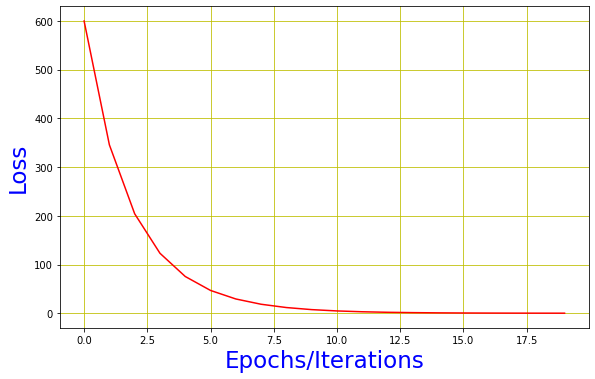

In [18]:
# Plotting the loss after each iteration
plt.figure(figsize=(8, 5))
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations", size=23, c='b')
plt.ylabel("Loss", size=23, c='b')
plt.show()

Juntando tudo, temos:

0, 	598.832763671875, 	-1.8554744720458984, 	-16.050857543945312
1, 	344.8099365234375, 	-7.248381614685059, 	-12.810097694396973
2, 	203.61093139648438, 	-3.6189045906066895, 	-10.271418571472168
3, 	122.75231170654297, 	-6.014379501342773, 	-8.204180717468262
4, 	75.23200988769531, 	-4.395925045013428, 	-6.574345588684082
5, 	46.699668884277344, 	-5.459136009216309, 	-5.2542924880981445
6, 	29.275009155273438, 	-4.73677396774292, 	-4.2088823318481445
7, 	18.49474334716797, 	-5.20813512802124, 	-3.365330457687378
8, 	11.760353088378906, 	-4.88530158996582, 	-2.695202589035034
9, 	7.523550033569336, 	-5.093930244445801, 	-2.155871868133545
10, 	4.8444342613220215, 	-4.9493818283081055, 	-1.7264935970306396
11, 	3.1441473960876465, 	-5.041501522064209, 	-1.3815455436706543
12, 	2.062293291091919, 	-4.9766082763671875, 	-1.1065082550048828
13, 	1.3726871013641357, 	-5.017141819000244, 	-0.8858295679092407
14, 	0.9325547218322754, 	-4.987899303436279, 	-0.7096918821334839
15, 	0.651395261

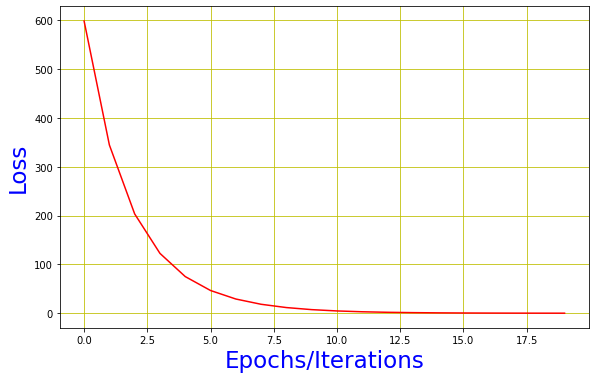

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
 

x = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * x
Y = y + 0.4 * torch.randn(x.size())
 
# defining the function for forward pass for prediction
def forward(x):
    return w * x + b
 
# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)
 
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
 
step_size = 0.1
loss_list = []
iter = 20
 
for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(x)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))
 
# Plotting the loss after each iteration
plt.figure(figsize=(8, 5))
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations", size=23, c='b')
plt.ylabel("Loss", size=23, c='b')
plt.show()